In this lecture, we study the **univariate isotonic regression**, which is distinctively different from many existing regression models. 

Simple (univariate) isotonic regression solves the following problem: given a sequence of n data points $y_{1}$, $y_{2}$, ...$y_{n}$, how can we best summarize this by a monotone sequence $\beta_{1}$, $\beta_{2}$, ...$\beta_{n}$? Formally, the original problem is to find:

$$ \hat{\beta}_{isotonic}= \textrm{argmin}_{\beta \in \mathbb{R}^{n}} \sum_{i=1}^{n} (y_{i}-\beta_{i})^{2}, \textrm{subject to}\  \beta_{1}\leqslant\beta_{2}\leqslant \dots \leqslant\beta_{n}, n=1$$

Another way to reformulate the problem is this:

$$ \textrm{Min}_{w_{i}>0} \sum_{i=1}^{n} w_{i}(y_{i}-\hat{y_{i}})^{2}, \textrm{subject to}\  \hat{y_{i}}\leqslant \hat{y_{j}}, \textrm{whenever}\ x_{i}\leqslant x_{j}, n=1, \textrm{min} (\hat{y_{i}})= \textrm{min}(y_{i}) \textrm{ and } \textrm{max} (\hat{y_{i}})= \textrm{max}(y_{i}) $$
 
Here $w_{i}$ are (optional) strictly positive weights. Throughout we assume that “monotone” means monotone nondecreasing: an analogous problem statement exists for monotone nonincreasing. A unique solution to the problem above exists and can be obtained using the **pool adjacent violators
algorithm (a.k.a PAVA)** (Barlow et al. 1972). Roughly speaking, PAVA works as follows. We start with $y_{1}$ on the left. We move to the right until we encounter the first violation $y_{i}>y_{i+1}$. Then we replace this pair by their average, and back-average to the left as needed, to get monotonicity. We continue this process to the right, until finally we reach $y_{n}$. If skillfully implemented, PAVA has a computational complexity of O(n) (Grotzinger & Witzgall 1984). A good review paper can be found from de Leeuw et al. (2009).

One can treat isotonic regression as a competitor of simple linear regression (univariate) as the latter assumes linearlity of the model whereas the isotonic regression assumes monotonicity of the regression function $ \mathbb{E}(y|x)=m(x)$.  

In [8]:
import requests
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

Isotonic regression has many applications in statistical inference, but usually used as an intermediary steps for something else (so we rarely run an isotonic regression on our own as our final step in our project). For example, one might use it to fit an isotonic curve to the means of some set of experimental results when an increase in those means according to some particular ordering is expected. A benefit of isotonic regression is that it is not constrained by any functional form, such as the linearity imposed by linear regression, as long as the function is monotonic increasing.

Another application is non-metric multidimensional scaling, where a low-dimensional embedding for data points is sought such that order of distances between points in the embedding matches order of dissimilarity between points. Isotonic regression is used iteratively to fit ideal distances to preserve relative dissimilarity order.

Below is a visualization of what isotonic regression looks like.

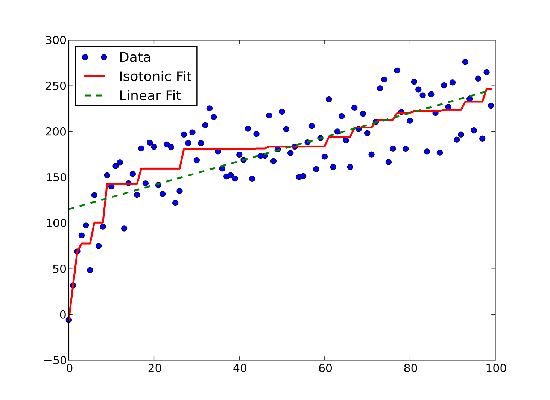

In [3]:
path="https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Isotonic_regression.svg/1462px-Isotonic_regression.svg.png"

response = requests.get(path)
img = Image.open(BytesIO(response.content))
im = img.resize((550, 400))
im

Now let's create a pseudo dataset composed of (x,y) in $\mathbb{R}^{2}$.

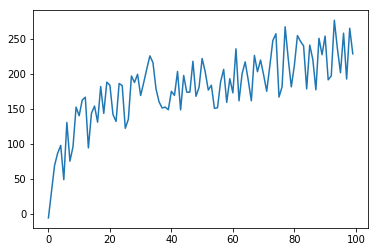

In [5]:
n = 100
rs = check_random_state(0)

x = np.arange(n)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))
plt.plot(x,y)

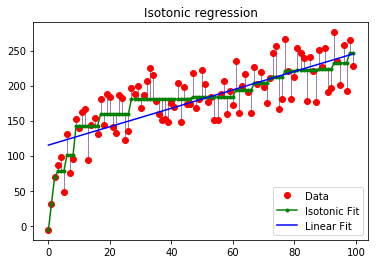

In [20]:
ir = IsotonicRegression()
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

# #############################################################################
# Plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12) # rd dot is original value
plt.plot(x, y_, 'g.-', markersize=6) # green line is isotonic regression
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-') # blue line is linear regression
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

References:
   - Barlow, R. E., Bartholomew, D., Bremner, J. M. & Brunk, H. D. (1972), Statistical inference under order restrictions; the theory and application of isotonic regression, Wiley, New York.
   - Grotzinger, S. J. & Witzgall, C. (1984), ‘Projections onto simplices’, Applied Mathematics and Optimization 12(1), 247–270.
   - de Leeuw, J., Hornik, K. & Mair, P. (2009), ‘Isotone optimization in R: Pool-adjacent-violators (PAVA) and active set methods’, Journal of Statistical Software 32(5), 1–24.
   - https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html